In [3]:
import math

# Define a very small tolerance for avoiding x = 0.
EPS = 1e-12

# Define the function f(x) = [x/2 - 1/x]^3 + [x/2 - 1/x] - 30.
def f(x):
    # Prevent division by zero.
    if abs(x) < EPS:
        raise ValueError(f"f(x) is undefined for x = {x} (division by zero).")
    return (x/2 - 1/x)**3 + (x/2 - 1/x) - 30

# Define the derivative of f(x).

def df(x):
    if abs(x) < EPS:
        raise ValueError(f"df(x) is undefined for x = {x} (division by zero).")
    g = x/2 - 1/x
    dg = 0.5 + 1/(x**2)
    return dg * (3*g**2 + 1)

# -----------------------------------------------------------------------------
# Bisection method implementation.
def bisection(a, b, tol=1e-6, max_iter=100):
    # Check that endpoints do not evaluate the singularity.
    if abs(a) < EPS or abs(b) < EPS:
        raise ValueError("Bisection endpoints cannot be too close to zero because f(x) is undefined at x=0.")
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        raise ValueError("The function must have opposite signs at endpoints a and b for bisection.")
    for i in range(max_iter):
        c = (a + b) / 2.0
        try:
            fc = f(c)
        except ValueError as e:
            raise ValueError(f"Encountered an error at c = {c}: {e}")

        if abs(fc) < tol or (b - a) / 2 < tol:
            return c
 
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (a + b) / 2.0

# -----------------------------------------------------------------------------
# Newton–Raphson method implementation.
def newton(x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        try:
            fx = f(x)
            dfx = df(x)
        except ValueError as e:
            raise ValueError(f"Error during iteration at x = {x}: {e}")
        if abs(dfx) < EPS:
            raise ValueError("Derivative too small; Newton–Raphson cannot proceed at x = {:.6f}".format(x))
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# -----------------------------------------------------------------------------
# Main execution: Compute the roots using both methods.
if __name__ == '__main__':
    # IMPORTANT: f(x) is undefined at x=0.
    # we must avoid x=0 when using the bisection method.
    # Therefore, we use a slightly modified interval for the lower root: [-1, -1e-6].
    
    try:
        # 1. Bisection method:
        lower_bisect = bisection(-1, -1e-6)  # adjusted upper bound to avoid x=0
        upper_bisect = bisection(6, 8)
        
        # 2. Newton–Raphson method "good"
        lower_newton_good = newton(-0.5)  
        upper_newton_good = newton(7)      
        
        # 3. Newton–Raphson method with a "poor"
        lower_newton_poor = newton(-2)
        
        # Print out the results:
        print("Bisection Method Results:")
        print("  Lower root (interval [-1, -1e-6]): {:.6f}".format(lower_bisect))
        print("  Upper root (interval [6, 8]):       {:.6f}".format(upper_bisect))
        print("")
        print("Newton–Raphson Method Results:")
        print("  Lower root (starting at x0 = -0.5):    {:.6f}".format(lower_newton_good))
        print("  Upper root (starting at x0 = 7):        {:.6f}".format(upper_newton_good))
        print("  Lower root (starting at x0 = -2):       {:.6f}".format(lower_newton_poor))
        
    except ValueError as err:
        print("An error occurred:", err)


Bisection Method Results:
  Lower root (interval [-1, -1e-6]): -0.316625
  Upper root (interval [6, 8]):       6.316625

Newton–Raphson Method Results:
  Lower root (starting at x0 = -0.5):    -0.316625
  Upper root (starting at x0 = 7):        6.316625
  Lower root (starting at x0 = -2):       6.316625


--- Bisection Method Results ---
Lower root (Bisection) in [-1, -0.1]: -0.31662480
f(-0.31662480) = -0.00000155
Upper root (Bisection) in [6, 8]: 6.31662478
f(6.31662478) = -0.00000011
------------------------------

--- Newton-Raphson Method Results ---
Newton-Raphson converged after 27 iterations.
Lower root (Newton-Raphson) starting at -0.5: -0.31662479
f(-0.31662479) = 0.00000000
Newton-Raphson converged after 4 iterations.
Upper root (Newton-Raphson) starting at 7.0: 6.31662479
f(6.31662479) = 0.00000000
------------------------------

--- Newton-Raphson Investigation (x0 = -2) ---
Newton-Raphson converged after 8 iterations.
Root found starting at x0 = -2: 6.31662479
f(6.31662479) = 0.00000000

Iteration steps starting from x0 = -2:
Iteration 0: x = -2.00000000, f(x) = -30.62500000
Iteration 1: x = 21.33333333, f(x) = 1178.31963080
Iteration 2: x = 14.41894432, f(x) = 341.15265641
Iteration 3: x = 10.02900570, f(x) = 93.63248443
Iteration 4: x = 7.52968570, f(x) = 21.54467936
Ite

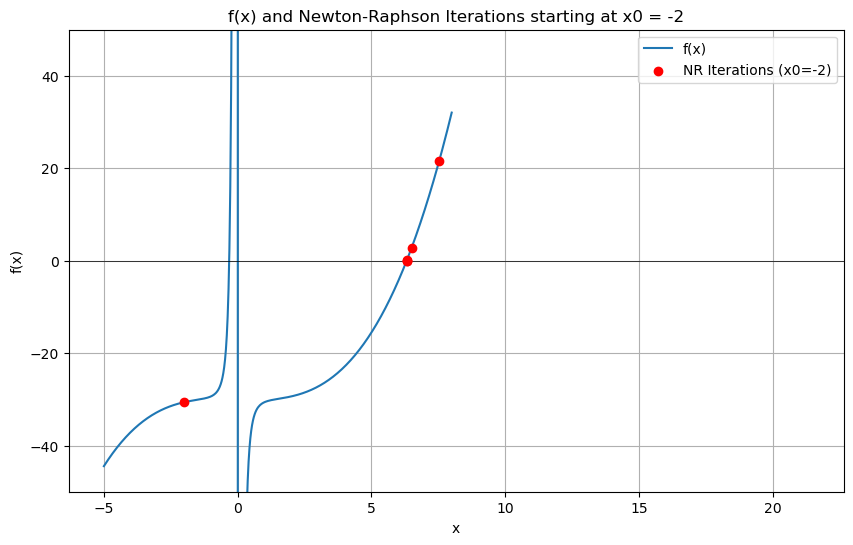

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
  """
  Calculates the value of the function f(x) = [(x/2) - (1/x)]^3 + [(x/2) - (1/x)] - 30.
  Handles division by zero for x=0 by returning infinity.
  """
  if x == 0:
    return np.inf 
  term = (x / 2.0) - (1.0 / x)
  return term**3 + term - 30.0


def f_prime(x):
  """
  Calculates the derivative of the function f(x).
  f'(x) = 3 * [(x/2) - (1/x)]^2 * (1/2 + 1/x^2) + (1/2 + 1/x^2)
  Handles division by zero for x=0 by returning infinity.
  """
  if x == 0:
      return np.inf 
  term = (x / 2.0) - (1.0 / x)
  derivative_term = 0.5 + (1.0 / x**2)
  return 3.0 * (term**2) * derivative_term + derivative_term

# --- 1. Bisection Method ---
def bisection_method(func, a, b, tol=1e-6, max_iter=100):
  """
  Finds a root of func(x) = 0 within the interval [a, b] using the bisection method.

  Args:
    func: The function for which to find the root.
    a: The lower bound of the interval.
    b: The upper bound of the interval.
    tol: The tolerance for convergence (absolute difference between iterations).
    max_iter: The maximum number of iterations.

  Returns:
    The estimated root is None if the method fails.
  """
  if func(a) * func(b) >= 0:
    print(f"Bisection method might fail: f(a) and f(b) must have opposite signs. f({a})={func(a)}, f({b})={func(b)}")
  
  iter_count = 0
  while (b - a) / 2.0 > tol and iter_count < max_iter:
    midpoint = (a + b) / 2.0
    if func(midpoint) == 0:
      return midpoint # Found the exact root
    elif func(a) * func(midpoint) < 0:
      b = midpoint
    else:
      a = midpoint
    iter_count += 1

  if iter_count == max_iter:
      print("Bisection method reached maximum iterations without converging to the desired tolerance.")

  return (a + b) / 2.0

print("--- Bisection Method Results ---")
# Find the lower root in [-1, 0] [cite: 5]

lower_root_bisection = bisection_method(f, -1.0, -0.1, tol=1e-8)
print(f"Lower root (Bisection) in [-1, -0.1]: {lower_root_bisection:.8f}")
if lower_root_bisection:
    print(f"f({lower_root_bisection:.8f}) = {f(lower_root_bisection):.8f}")


# Find the upper root in [6, 8] [cite: 5]
upper_root_bisection = bisection_method(f, 6.0, 8.0, tol=1e-8)
print(f"Upper root (Bisection) in [6, 8]: {upper_root_bisection:.8f}")
if upper_root_bisection:
    print(f"f({upper_root_bisection:.8f}) = {f(upper_root_bisection):.8f}")
print("-" * 30)


# --- 2. Newton-Raphson Method ---
def newton_raphson_method(func, func_prime, x0, tol=1e-6, max_iter=100):
  """
  Finds a root of func(x) = 0 using the Newton-Raphson method.

  Args:
    func: The function for which to find the root.
    func_prime: The derivative of the function.
    x0: The initial guess.
    tol: The tolerance for convergence (absolute difference between iterations).
    max_iter: The maximum number of iterations.

  Returns:
    The estimated root, or None if the method fails or diverges.
  """
  xn = x0
  iterations = []
  for n in range(max_iter):
    iterations.append(xn)
    fxn = func(xn)
    if abs(fxn) < tol:
      print(f"Newton-Raphson converged after {n} iterations.")
      return xn, iterations
    fpxn = func_prime(xn)
    if fpxn == 0:
      print("Newton-Raphson failed: Derivative is zero.")
      return None, iterations
    
    xn_new = xn - fxn / fpxn
    
 
    if abs(xn_new - xn) > abs(xn)*100 and n > 5 : 
        print(f"Newton-Raphson appears to be diverging. Last value: {xn_new}")
     
        
    if abs(xn_new - xn) < tol: 
        print(f"Newton-Raphson converged after {n+1} iterations (step size tolerance).")
        iterations.append(xn_new)
        return xn_new, iterations

    xn = xn_new
    
  print("Newton-Raphson failed to converge within maximum iterations.")
  return None, iterations

print("\n--- Newton-Raphson Method Results ---")



lower_root_nr, _ = newton_raphson_method(f, f_prime, x0=-0.5, tol=1e-8)
if lower_root_nr is not None:
    print(f"Lower root (Newton-Raphson) starting at -0.5: {lower_root_nr:.8f}")
    print(f"f({lower_root_nr:.8f}) = {f(lower_root_nr):.8f}")



upper_root_nr, _ = newton_raphson_method(f, f_prime, x0=7.0, tol=1e-8)
if upper_root_nr is not None:
    print(f"Upper root (Newton-Raphson) starting at 7.0: {upper_root_nr:.8f}")
    print(f"f({upper_root_nr:.8f}) = {f(upper_root_nr):.8f}")
print("-" * 30)


# --- 3. Investigation of Newton-Raphson with x0 = -2 --- [cite: 6]
print("\n--- Newton-Raphson Investigation (x0 = -2) ---")

root_investigation, iterations_inv = newton_raphson_method(f, f_prime, x0=-2.0, tol=1e-8)

if root_investigation is not None:
    print(f"Root found starting at x0 = -2: {root_investigation:.8f}")
    print(f"f({root_investigation:.8f}) = {f(root_investigation):.8f}")
else:
    print("Method did not converge or failed.")

print("\nIteration steps starting from x0 = -2:")
for i, x_val in enumerate(iterations_inv):
    print(f"Iteration {i}: x = {x_val:.8f}, f(x) = {f(x_val):.8f}")

# --- Plotting section for Investigation (x0 = -2) ---


x_vals = np.linspace(-5, 8, 400)

y_vals = np.array([f(x_val) for x_val in x_vals])
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.ylim(-50, 50) 
plt.title('f(x) and Newton-Raphson Iterations starting at x0 = -2')
plt.xlabel('x')
plt.ylabel('f(x)')


iteration_points = np.array(iterations_inv)
# Calculate y-values for each iteration point individually
iteration_y_values = [f(p) for p in iteration_points]

# Use the calculated y-values in the scatter plot
plt.scatter(iteration_points, iteration_y_values, color='red', zorder=5, label='NR Iterations (x0=-2)')


plt.legend()
plt.grid(True)
plt.show()

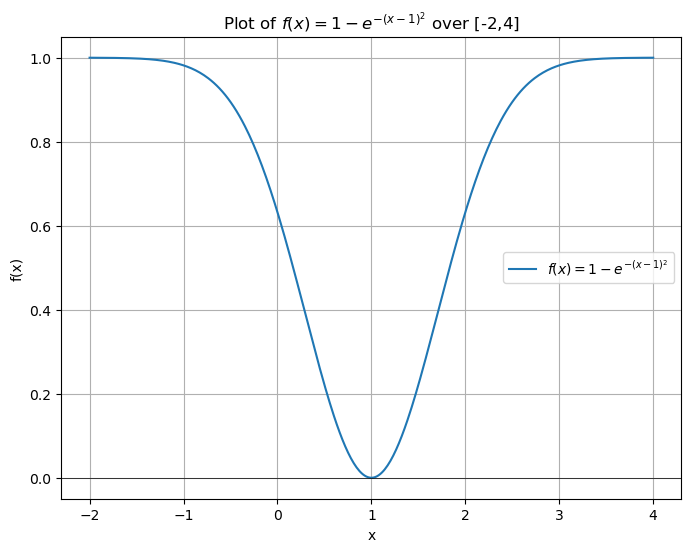

Standard Newton–Raphson Method:
  Root estimate: 0.9999992016041636
  Iterates: [0.5, 0.7840254166877414, 0.8945708630393713, 0.9475794892217122, 0.9738257893299668, 0.986917378606835, 0.9934592491243145, 0.996729694518808, 0.9983648560033336, 0.9991824290946477, 0.9995912146839487, 0.999795607358997, 0.9998978036816322, 0.9999489018413292, 0.9999744509209626, 0.9999872254598169, 0.9999936127310814, 0.9999968063694725, 0.9999984031862885, 0.9999992016041636]

Modified Newton–Raphson Method (m=2):
  Root estimate: 1.0000000000021882
  Iterates: [0.5, 1.0680508333754828, 0.9998421876448602, 1.0000000000021882, 1.0000000000021882]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the function and its derivative.
def f(x):
    return 1 - np.exp(- (x - 1)**2)

def df(x):
    return 2 * (x - 1) * np.exp(- (x - 1)**2)

# Standard Newton–Raphson iteration.
def newton_method(x0, tol=1e-6, max_iter=100):
    x = x0
    iterates = [x]
    for i in range(max_iter):
        f_val = f(x)
        df_val = df(x)
        if abs(df_val) < 1e-12:
            print(f"Newton: Derivative near zero at x = {x:.6f}; iteration may fail.")
            break
        x_new = x - f_val / df_val
        iterates.append(x_new)
        if abs(x_new - x) < tol:
            return x_new, iterates
        x = x_new
    return x, iterates

# Modified Newton–Raphson iteration for a double root (multiplicity m = 2).
def newton_modified(x0, tol=1e-6, max_iter=100, m=2):
    x = x0
    iterates = [x]
    for i in range(max_iter):
        f_val = f(x)
        df_val = df(x)
        if abs(df_val) < 1e-12:
            print(f"Modified Newton: Derivative near zero at x = {x:.6f}; iteration may fail.")
            break
        x_new = x - m * f_val / df_val
        iterates.append(x_new)
        if abs(x_new - x) < tol:
            return x_new, iterates
        x = x_new
    return x, iterates

# --------------------------------------------------------------------
# 1. Plot the function f(x) over the range [-2, 4].
x_vals = np.linspace(-2, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x)=1-e^{-(x-1)^2}$')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x)=1-e^{-(x-1)^2}$ over [-2,4]')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------------------------------
# 2 & 3. Use Newton–Raphson and Modified Newton–Raphson methods.

x0 = 0.5

# Standard Newton–Raphson.
root_newton, newton_iters = newton_method(x0)
# Modified Newton–Raphson with multiplicity m=2.
root_mod_newton, mod_newton_iters = newton_modified(x0, m=2)

print("Standard Newton–Raphson Method:")
print("  Root estimate:", root_newton)
print("  Iterates:", newton_iters)
print("")
print("Modified Newton–Raphson Method (m=2):")
print("  Root estimate:", root_mod_newton)
print("  Iterates:", mod_newton_iters)


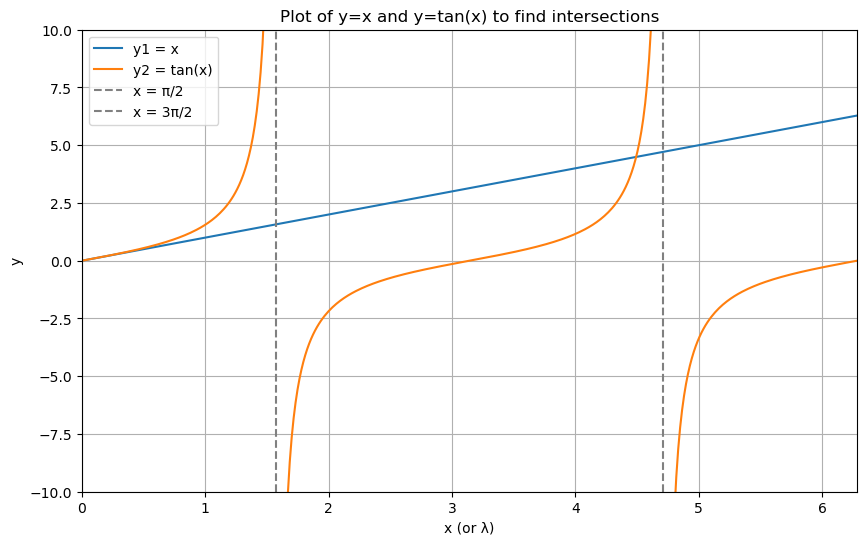

Plot shows the first positive intersection occurs between π/2 (≈1.57) and 3π/2 (≈4.71).
Let's use the interval [4.0, 4.6] for bisection.
------------------------------

--- Solving λ = tan(λ) using Bisection ---
Bisection converged after 25 iterations.

The smallest positive solution (λ) is approximately: 4.49340945
Verification: f(4.49340945) = 1.22e-07
------------------------------

--- Calculating Buckling Load P_cr ---
The relationship is: λ = L * sqrt(P_cr / EI)
Rearranging gives: P_cr = EI * (λ / L)²
Substituting the found λ (4.49340945):
P_cr = EI * (4.49340945 / L)²
P_cr ≈ 20.1907 * (EI / L²)

Note: The numerical value of P_cr cannot be calculated because the values
for column length (L), Young's modulus (E), and moment of inertia (I)
were not provided in the problem description.
------------------------------


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Plotting y=x and y=tan(x) ---


x = np.linspace(0, 2 * np.pi, 400) 
y1 = x
y2 = np.tan(x)

# To handle vertical asymptotes in tan(x) for plotting:

threshold = 20 
y2[y2 > threshold] = np.nan
y2[y2 < -threshold] = np.nan

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y1 = x')
plt.plot(x, y2, label='y2 = tan(x)')

# Sjow which are the asymptotes
plt.axvline(np.pi/2, color='gray', linestyle='--', label='x = π/2')
plt.axvline(3*np.pi/2, color='gray', linestyle='--', label='x = 3π/2')

plt.ylim(-10, 10) 
plt.xlim(0, 2*np.pi)
plt.xlabel('x (or λ)')
plt.ylabel('y')
plt.title('Plot of y=x and y=tan(x) to find intersections')
plt.legend()
plt.grid(True)
plt.show()

print("Plot shows the first positive intersection occurs between π/2 (≈1.57) and 3π/2 (≈4.71).")
print("Let's use the interval [4.0, 4.6] for bisection.")
print("-" * 30)



def f_buckling(lamda):
  """Function f(λ) = λ - tan(λ)"""

  if np.isclose(np.cos(lamda), 0.0):

      return -np.sign(np.sin(lamda)) * float('inf')
  return lamda - np.tan(lamda)

# --- Bisection Method Implementation (reused) ---
def bisection_method(func, a, b, tol=1e-8, max_iter=100):
  """
  Finds a root of func(x) = 0 within the interval [a, b] using the bisection method.
  """

  fa = func(a)
  fb = func(b)
  if fa * fb >= 0:
    print(f"Bisection method might fail: f(a) and f(b) must have opposite signs.")
    print(f"f({a})={fa:.4f}, f({b})={fb:.4f}")
    
    # return None 

  iter_count = 0
  midpoint = a 
  while (b - a) / 2.0 > tol and iter_count < max_iter:
    midpoint = (a + b) / 2.0
    f_mid = func(midpoint)

    if f_mid == 0:
      break 
    elif fa * f_mid < 0:
      b = midpoint
      fb = f_mid 
    else:
      a = midpoint
      fa = f_mid 
    iter_count += 1
    
  if iter_count == max_iter:
    print("Bisection method reached maximum iterations.")

  root = (a + b) / 2.0
  print(f"Bisection converged after {iter_count} iterations.")
  return root

# --- Find the root using Bisection ---
print("\n--- Solving λ = tan(λ) using Bisection ---")


interval_a = 4.0
interval_b = 4.6 
lambda_sol = bisection_method(f_buckling, interval_a, interval_b, tol=1e-8)

if lambda_sol is not None:
    print(f"\nThe smallest positive solution (λ) is approximately: {lambda_sol:.8f}")
    print(f"Verification: f({lambda_sol:.8f}) = {f_buckling(lambda_sol):.2e}") # Should be close to zero
else:
    print("Bisection method failed to find the root in the given interval.")

print("-" * 30)


# --- Calculate Buckling Load P_cr ---
print("\n--- Calculating Buckling Load P_cr ---")
if lambda_sol is not None:
    print(f"The relationship is: λ = L * sqrt(P_cr / EI)")
    print(f"Rearranging gives: P_cr = EI * (λ / L)²")
    print(f"Substituting the found λ ({lambda_sol:.8f}):")
    print(f"P_cr = EI * ({lambda_sol:.8f} / L)²")
    p_cr_factor = lambda_sol**2
    print(f"P_cr ≈ {p_cr_factor:.4f} * (EI / L²)")
    print("\nNote: The numerical value of P_cr cannot be calculated because the values")
    print("for column length (L), Young's modulus (E), and moment of inertia (I)")
    print("were not provided in the problem description.")
else:
    print("Cannot calculate P_cr because λ was not found.")

print("-" * 30)

In [17]:
import numpy as np

def get_matrices(a):

    A = np.array([[1, 2, -3],
                  [3, -1, 5],
                  [4, 1, a**2 - 14]], dtype=float)
    B = np.array([[4],
                  [2],
                  [a + 2]], dtype=float)
    return A, B


a_values = [-4, 4]

for a in a_values:
    A, B = get_matrices(a)
    detA = np.linalg.det(A)
    rankA = np.linalg.matrix_rank(A)
    augmented = np.hstack((A, B))  
    rank_augmented = np.linalg.matrix_rank(augmented)
    
    print("For a =", a)
    print("Determinant of A:", detA)
    print("Rank of A:", rankA)
    print("Rank of [A|B]:", rank_augmented)
    print("-" * 40)


For a = -4
Determinant of A: 0.0
Rank of A: 2
Rank of [A|B]: 3
----------------------------------------
For a = 4
Determinant of A: 0.0
Rank of A: 2
Rank of [A|B]: 2
----------------------------------------


In [19]:
import sympy as sp


a = sp.symbols('a')


A = sp.Matrix([[1, 2, -3],
               [3, -1, 5],
               [4, 1, a**2 - 14]])
B = sp.Matrix([[4],
               [2],
               [a + 2]])


detA = sp.simplify(A.det())
print("Symbolic determinant of A:")
sp.pprint(detA)
print()


a_solutions = sp.solve(detA, a)
print("Values of a for which A is singular:")
print(a_solutions)
print()


for val in a_solutions:
    A_val = A.subs(a, val)
    B_val = B.subs(a, val)
    augmented = A_val.row_join(B_val)
    rankA = A_val.rank()
    rank_augmented = augmented.rank()
    
    print("For a =", val)
    print("Matrix A:")
    sp.pprint(A_val)
    print("Determinant:", A_val.det())
    print("Rank of A:", rankA)
    print("Rank of [A|B]:", rank_augmented)
    print("-" * 40)


if not (4 in a_solutions or -4 in a_solutions):
    X = sp.symbols('x1 x2 x3')
    solution = sp.simplify(A.inv() * B)
    print("Symbolic solution for A * X = B when A is non-singular:")
    sp.pprint(solution)


Symbolic determinant of A:
         2
112 - 7⋅a 

Values of a for which A is singular:
[-4, 4]

For a = -4
Matrix A:
⎡1  2   -3⎤
⎢         ⎥
⎢3  -1  5 ⎥
⎢         ⎥
⎣4  1   2 ⎦
Determinant: 0
Rank of A: 2
Rank of [A|B]: 3
----------------------------------------
For a = 4
Matrix A:
⎡1  2   -3⎤
⎢         ⎥
⎢3  -1  5 ⎥
⎢         ⎥
⎣4  1   2 ⎦
Determinant: 0
Rank of A: 2
Rank of [A|B]: 2
----------------------------------------


In [25]:
import numpy as np
import math

# Geometry constant
s = math.sqrt(41)

# The unknown vector is:
# X = [F1, F2, F3, F4, F5, F6, F8, RAx, RAy, Rdy]

# Our 10 equilibrium equations (in order) are:
# Equation 1 (Joint A, horizontal):  F1 + (5/s)*F4 +    RAx                      = 0
# Equation 2 (Joint A, vertical):    (4/s)*F4 +         RAy                      = 0
# Equation 3 (Joint B, horizontal): -F1 +     F2 + (5/s)*F6                       = 0
# Equation 4 (Joint B, vertical):     F5 + (4/s)*F6                -  P1         = 0
# Equation 5 (Joint C, horizontal): -F2 +     F3 - (5/s)*F4                       = 0
# Equation 6 (Joint C, vertical):     F8 + (4/s)*F4                -  P2         = 0
# Equation 7 (Joint D, horizontal): -F3       - (5/s)*F6                        = 0
# Equation 8 (Joint D, vertical):      (4/s)*F6 +         Rdy                    = 0
# Equation 9 (Compatibility at joint E): -(8/s)*F4 - F5                         = 0
# Equation 10 (Compatibility at joint F):-(8/s)*F6 - F8                         = 0


def solve_truss(P1, P2):
    # Create matrix A_mat (here 10x10) where the unknowns are ordered as:
    # [F1, F2, F3, F4, F5, F6, F8, RAx, RAy, Rdy]
    A_mat = np.array([
        [ 1,      0,      0,    5/s,     0,      0,    0,  1,  0,  0 ],  # Eq1
        [ 0,      0,      0,    4/s,     0,      0,    0,  0,  1,  0 ],  # Eq2
        [-1,      1,      0,     0,      0,   5/s,     0,  0,  0,  0 ],  # Eq3
        [ 0,      0,      0,     0,      1,   4/s,     0,  0,  0,  0 ],  # Eq4: = P1
        [ 0,     -1,      1,   -5/s,     0,      0,    0,  0,  0,  0 ],  # Eq5
        [ 0,      0,      0,    4/s,     0,      0,    1,  0,  0,  0 ],  # Eq6: = P2
        [ 0,      0,     -1,    0,       0,   -5/s,    0,  0,  0,  0 ],  # Eq7
        [ 0,      0,      0,    0,       0,    4/s,    0,  0,  0,  1 ],  # Eq8
        [ 0,      0,      0, -8/s,      -1,     0,    0,  0,  0,  0 ],  # Eq9
        [ 0,      0,      0,    0,       0,  -8/s,    -1, 0,  0,  0 ]   # Eq10
    ], dtype=float)
    
    # The right-hand side vector: only equations 4 and 6 contain the external loads.

    b_vec = np.array([0, 0, 0, P1, 0, P2, 0, 0, 0, 0], dtype=float)
    
    # Solve the linear system
    X = np.linalg.solve(A_mat, b_vec)
    

    F1 = X[0]
    F2 = X[1]
    F3 = X[2]
    F4 = X[3]
    F5 = X[4]
    F6 = X[5]
    # By similartiy, F7 = F4 and F9 = F6.
    F7 = F4
    F8 = X[6]
    F9 = F6
    RAx = X[7]
    RAy = X[8]
    Rdy = X[9]
    
    return {
        "F1": F1, "F2": F2, "F3": F3, "F4": F4, "F5": F5,
        "F6": F6, "F7": F7, "F8": F8, "F9": F9,
        "RAx": RAx, "RAy": RAy, "Rdy": Rdy
    }

# Define the external load cases:

load_cases = [
    (100, 0),
    (100, 100),
    (50, 100)
]


for idx, (P1, P2) in enumerate(load_cases, 1):
    results = solve_truss(P1, P2)
    print(f"\nLoad case {idx}: P1 = {P1} kN, P2 = {P2} kN")
    print("Member forces (in kN):")
    for member in ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9"]:
        print(f"  {member} = {results[member]:8.2f}")
    print("Support reactions (in kN):")
    print(f"  RAx = {results['RAx']:8.2f}   (should be nearly zero)")
    print(f"  RAy = {results['RAy']:8.2f}")
    print(f"  Rdy = {results['Rdy']:8.2f}")

    min_reac = min(results['RAy'], results['Rdy'])
    max_reac = max(results['RAy'], results['Rdy'])
    print(f"  Minimum vertical reaction: {min_reac:8.2f} kN")
    print(f"  Maximum vertical reaction: {max_reac:8.2f} kN")
    print("-" * 50)



Load case 1: P1 = 100 kN, P2 = 0 kN
Member forces (in kN):
  F1 =    83.33
  F2 =   125.00
  F3 =    41.67
  F4 =  -106.72
  F5 =   133.33
  F6 =   -53.36
  F7 =  -106.72
  F8 =    66.67
  F9 =   -53.36
Support reactions (in kN):
  RAx =     0.00   (should be nearly zero)
  RAy =    66.67
  Rdy =    33.33
  Minimum vertical reaction:    33.33 kN
  Maximum vertical reaction:    66.67 kN
--------------------------------------------------

Load case 2: P1 = 100 kN, P2 = 100 kN
Member forces (in kN):
  F1 =   125.00
  F2 =   250.00
  F3 =   125.00
  F4 =  -160.08
  F5 =   200.00
  F6 =  -160.08
  F7 =  -160.08
  F8 =   200.00
  F9 =  -160.08
Support reactions (in kN):
  RAx =     0.00   (should be nearly zero)
  RAy =   100.00
  Rdy =   100.00
  Minimum vertical reaction:   100.00 kN
  Maximum vertical reaction:   100.00 kN
--------------------------------------------------

Load case 3: P1 = 50 kN, P2 = 100 kN
Member forces (in kN):
  F1 =    83.33
  F2 =   187.50
  F3 =   104.17
  F4 = 